In [406]:
import random
import numpy as np
import pandas as pd

In [407]:
def normalize_theta(theta):
    # Chuẩn hóa sao cho tổng bằng 1
    return theta / np.sum(theta)

In [408]:
def transform_x52(value):
    return -value

In [409]:
df = pd.read_csv('../export.csv')
df['x52'] = df['x52'].apply(transform_x52)

filtered_df = df[df['label'] == 1]
X = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = filtered_df['label'].values 

In [410]:
filtered_df = df[df['label'] == 2]
X2 = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values

In [411]:
def foo(theta):
    return np.dot(X, theta)
def foo2(theta):
    return np.dot(X2, theta)
    
def fitness(theta):
    target_value1 = 500 # Giá trị mục tiêu
    label1 = [300,500,580]
    label2 = [580,620,670]

    normalized_theta = normalize_theta(theta)

    ans1 = foo(normalized_theta)
    ans2 = foo2(normalized_theta)
    # # if ans == target_value:
    # #     return 9999
    # # # el
    # if lower_bound <= ans <= upper_bound:
    #     return 99999
    # else:
    #     return abs(1 / (ans - target_value))
    condition1 = np.all((label1[0] <= ans1) & (ans1 <= label1[2]))

    # Điều kiện kiểm tra cho ans2
    condition2 = np.all((label2[0] <= ans2) & (ans2 <= label2[2]))


    if condition1 and condition2:
        return 99999
    elif condition1 or condition2:
        return 999
    else:
        return abs(1 / (ans1.mean() - label1[1] + ans2.mean() - label2[1]))


In [412]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
    return tuple(child)

def mutate(child, mutation_rate):
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [413]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 1000
num_generations = 10000

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)


In [414]:
for generation_id in range(num_generations):
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions.sort(reverse=True)

    print(f"=== Gen {generation_id} best solutions ===")
    print(rankedsolutions[0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] > 9999:
        break

    bestSolutions = rankedsolutions[:100]
    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

=== Gen 0 best solutions ===
(999, (0.9784091400464067, 0.631128061769047, 0.4250236823653768, 0.4049688683971432, 0.4507952944828598, 0.13564928524265973, 0.108901311491727, 0.39184507438481586, 0.3695217574373315, 0.10986560363369857, 0.5176440248795094, 0.5544113258364803, 0.9013883250136939, 0.8990786933597166, 0.45655509902228597, 0.17889521366274896))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
theta = normalize_theta(solutions[0])

In [ ]:
theta = theta.reshape(-1, 1)
print(theta)

[[4.66940450e-03]
 [8.75637708e-02]
 [6.90368446e-02]
 [5.57277773e-02]
 [6.56281146e-02]
 [6.99095845e-02]
 [4.15691404e-02]
 [7.55595457e-02]
 [7.92552919e-02]
 [7.98288003e-02]
 [1.02749810e-01]
 [9.88872915e-05]
 [4.43713008e-02]
 [1.66130617e-02]
 [1.10744216e-01]
 [9.66744490e-02]]


In [ ]:
def calculate_features(sub_features):
    sum = sub_features.sum()
    b = (1/sum)*sub_features
    a = sub_features[0]/b[0]
    return(a , b )

In [ ]:
ab1 = theta[0:2]
ab2 = theta[2:6]
ab3 = theta[6:8]
ab4 = theta[8:11]
ab5 = theta[11:13]
ab6 = theta[13:14]
ab7 = theta[14:16]
ab_all = [ab1, ab2, ab3, ab4, ab5, ab6, ab7]
final_a = []
final_b = []
for ab in ab_all:
    a, b = calculate_features(ab)
    final_a.append(a)
    final_b.append(b)
    # print(calculate_features(ab))
final_b[4][-1]= -final_b[4][-1] 
final_a = final_a/np.array(final_a).sum()

In [ ]:
def fn_combined_features(features):
    combined = []
    for items in features:
        tmp = []
        for index, item in enumerate(items):
            for _ in item:
                tmp.append(_)
        combined.append(tmp)
    return np.array(combined)

In [ ]:
def about(value, _min=300, _max=850):
    if value < _min:
        value = _min
    elif value > _max:
        value = _max
    return int(value) 

In [ ]:
final_b

[array([[0.05062608],
        [0.94937392]]),
 array([[0.26521794],
        [0.21408867],
        [0.25212266],
        [0.26857073]]),
 array([[0.35490145],
        [0.64509855]]),
 array([[0.30269301],
        [0.30488336],
        [0.39242363]]),
 array([[ 0.00222368],
        [-0.99777632]]),
 array([[1.]]),
 array([[0.53391635],
        [0.46608365]])]

In [ ]:
final_b = fn_combined_features(final_b)

C:\Users\Dao Trong Hoan\AppData\Local\Temp\ipykernel_3980\2614134860.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(combined)


In [ ]:
from collections import defaultdict
count = defaultdict(int)

def check_acc(label, score):
    if label == 1:
        if score >= 300 and score <= 580:
            return True
        else:
            return False
    if label == 2:
        if score > 580 and score <= 670:
            return True
        else:
            return False
    if label == 3:
        if score > 670 and score <= 740:
            return True
        else:
            return False
    if label == 4:
        if score > 740 and score <= 800:
            return True
        else:
            return False
    if label == 5:
        if score > 800 and score <= 850:
            return True
        else:
            return False


In [ ]:
def evaluate(matrices, y):
    list_score = []
    for i in range(len(matrices)):
        matric = matrices[i]
        # print(final_a[0] * np.dot(final_b[0], matric[0:2]), final_a[1] * np.dot(final_b[1], matric[2:6]), final_a[2] * np.dot(final_b[2], matric[6:8]), final_a[3] * np.dot(final_b[3], matric[8:11]), final_a[4] * about(np.dot(final_b[4], matric[11:13])), final_a[5] * np.dot(final_b[5], matric[13:14]), final_a[6] * np.dot(final_b[6], matric[14:16]))
        score = (
            final_a[0] * np.dot(final_b[0], matric[0:2])
            + final_a[1] * np.dot(final_b[1], matric[2:6])
            + final_a[2] * np.dot(final_b[2], matric[6:8])
            + final_a[3] * np.dot(final_b[3], matric[8:11])
            + final_a[4] * about(np.dot(final_b[4], matric[11:13]))
            + final_a[5] * np.dot(final_b[5], matric[13:14])
            + final_a[6] * np.dot(final_b[6], matric[14:16])
        )
        if check_acc(y[i], score):
            count[y[i]] += 1

In [ ]:
df = pd.read_csv(f'../export.csv')
X = df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = df['label'].values

In [ ]:
evaluate(X,y)
theta

array([[4.66940450e-03],
       [8.75637708e-02],
       [6.90368446e-02],
       [5.57277773e-02],
       [6.56281146e-02],
       [6.99095845e-02],
       [4.15691404e-02],
       [7.55595457e-02],
       [7.92552919e-02],
       [7.98288003e-02],
       [1.02749810e-01],
       [9.88872915e-05],
       [4.43713008e-02],
       [1.66130617e-02],
       [1.10744216e-01],
       [9.66744490e-02]])

In [ ]:
count_label = {}
# Đếm số lần xuất hiện của mỗi label trong y
for label in y:
    if label in count_label:
        count_label[label] += 1
    else:
        count_label[label] = 1

# In từ điển count_label

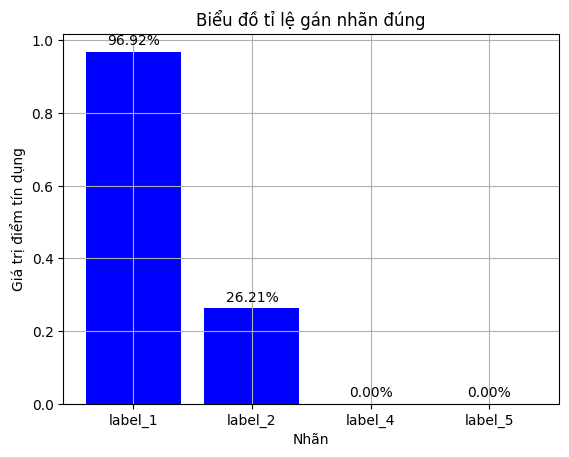

In [ ]:
import matplotlib.pyplot as plt

label_name = ['label_1', 'label_2', 'label_4', 'label_5']
accuracy_list = [count[tmp]/count_label[tmp] for tmp in count_label]

# Tạo danh sách chỉ số từ 1 đến độ dài của mảng
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

# Hiển thị giá trị trực tiếp trên đỉnh của mỗi cột với tên nhãn
for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)

plt.grid(True)
plt.show()
